In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Add clicks on social media 

### Data:
Dataset on Social media ads describing users, whether users have purchased a product by clicking on the advertisements shown to them.
Source: https://www.kaggle.com/datasets/akram24/social-network-ads?resource=download

In [66]:
df = pd.read_csv('Social_Network_Ads (1).csv')

X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:, 4].values

### Display of the first 5 rows of the dataset

In [67]:
display(df.head())

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Age distribution of the candidates in the dataset. 

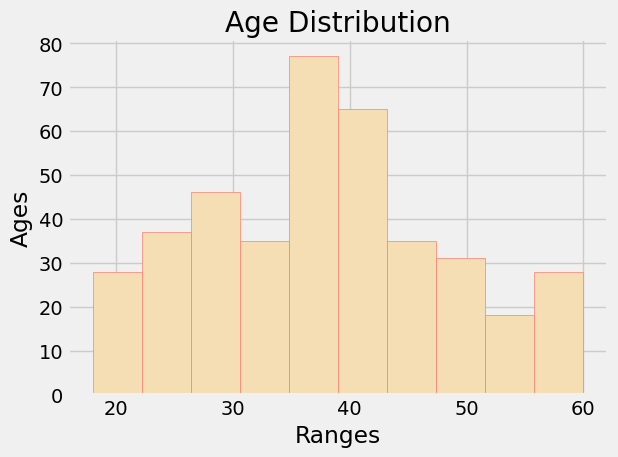

In [92]:
#Graphical Distribution of our data age

plt.hist(df['Age'] ,color = 'Wheat' , edgecolor = 'Salmon')
plt.xlabel('Ranges')
plt.ylabel('Ages')
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

### This histogram shows that there is a negligible difference between male and female in clicks and buys resulting from a click on an advertisement. 

<AxesSubplot:xlabel='Purchased', ylabel='count'>

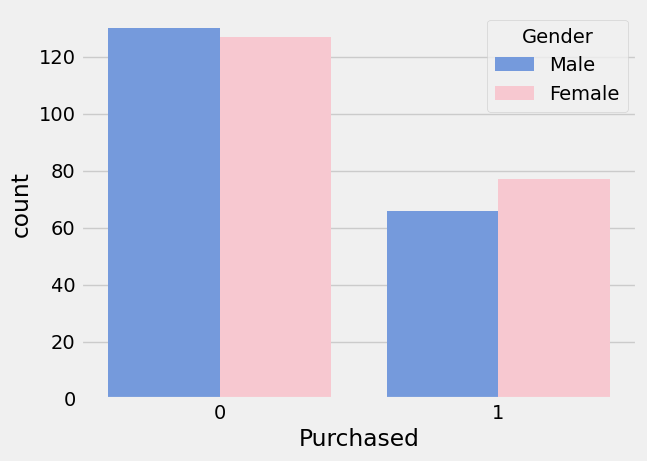

In [89]:
sns.countplot(x=df['Purchased'], hue='Gender', data=df, palette=["CornflowerBlue", "Pink"])



### The estimated salary is distributed normally

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

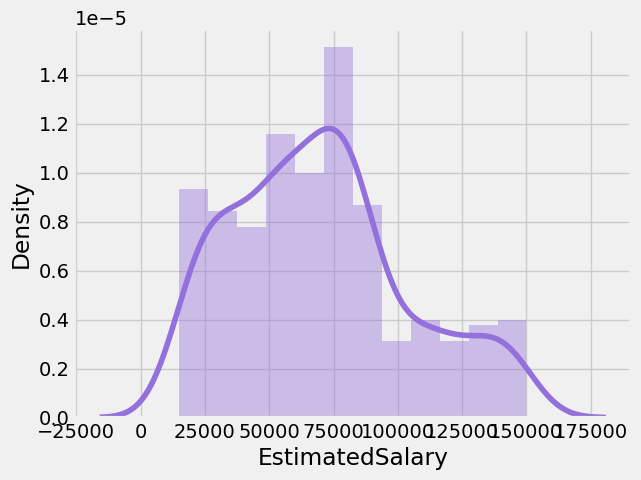

In [94]:
sns.distplot(df['EstimatedSalary'], color='MediumPurple')

### The correlation between age and estimated salary and whether or not the person clicked on the advertisement and purchased the product. 

<AxesSubplot:>

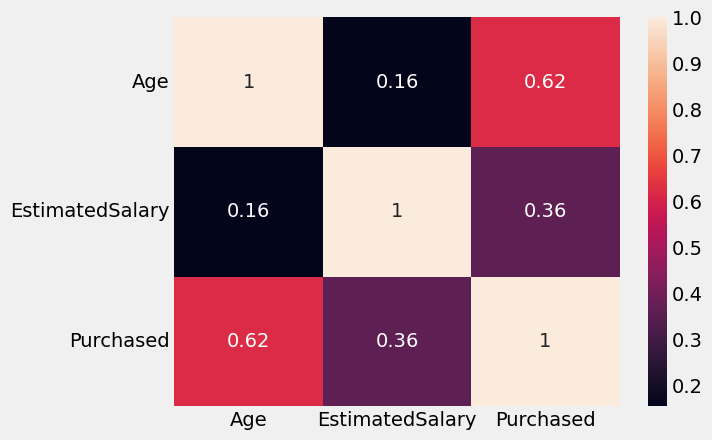

In [69]:
data = dataset.drop('User ID', axis=1)
sns.heatmap(data.corr(), annot=True)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [71]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [72]:
# Fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [73]:
y_pred = classifier.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 8 24]]


0.89

### This plot shows the correlation between estimated salary and age and whether or not the person clicked on the advertisement based on the data.

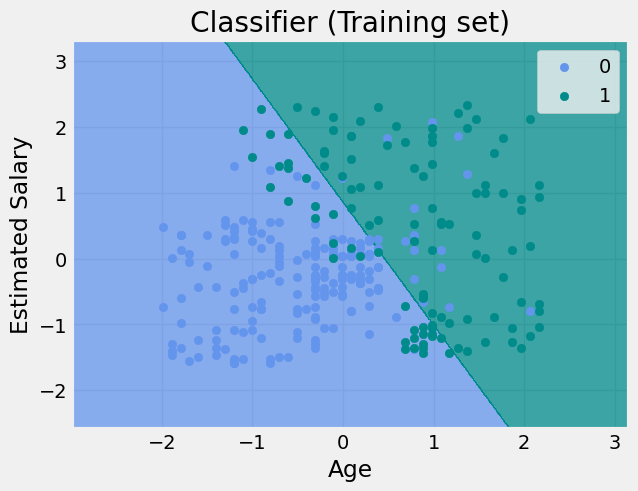

In [80]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['CornflowerBlue', 'DarkCyan']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(['CornflowerBlue','DarkCyan'])(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()





### Plot of the test set. The model tested as a good model to predict whether or not a person will click on an advertisement based on their age and estimated salary. It can therefore be used for marketing purposes to grow the number of clicks on adds and products sold.


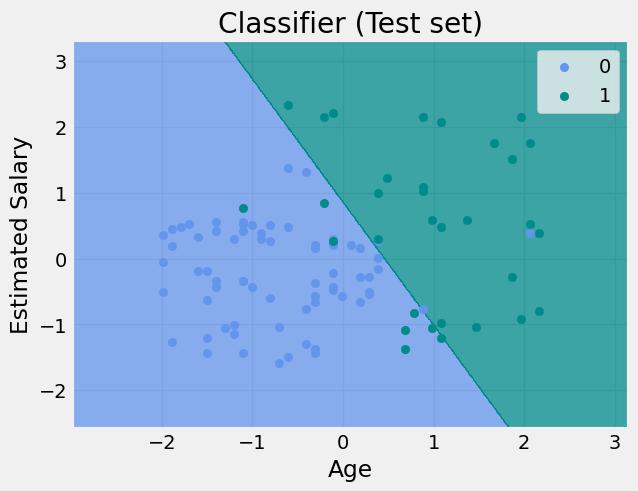

In [81]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(['CornflowerBlue', 'DarkCyan']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color =ListedColormap(['CornflowerBlue', 'DarkCyan'])(i), label=j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
